In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import rcParams
import seaborn as sns
%matplotlib inline

In [2]:
fname = 'dat_gals.csv'
df = pd.read_csv(fname)
df.head()

,ID,z,scan,D25/2,d,B-mag,err_B,B-V,Morph,t_morph,err_t,bri25,survey,key
0,UGC1736,0.005210,6597.0,144.0,21.00,11.62,0.18,0.68,SABc,5.1,0.6,22.91,GHASP,all
1,UGC5840,0.001935,6575.5,225.0,6.91,10.50,0.09,0.68,Sbc,4.0,0.3,23.33,GHASP,UGC5840
2,UGC8937,0.009877,6627.6,69.0,4.96,12.78,0.36,NaN,SBb,3.1,0.4,22.92,GHASP,all
3,UGC11283,0.006508,6605.5,69.0,32.60,13.61,0.06,0.60,Sd,7.9,0.8,22.84,GHASP,all
4,UGC3685,0.005994,6602.1,120.0,28.10,13.00,0.33,NaN,Sb,3.0,0.4,22.76,GHASP,all


In [ ]:
plt.style.use('seaborn-notebook')
plt.rcParams['figure.figsize'] = 3, 3
sns.pairplot(df.drop(columns=['ID', 'z', 'err_B', 'Morph', 'err_t']),
             hue='key',
             diag_kind='kde',
             dropna=True)

In [42]:
from scipy.stats import pearsonr
def corrfunc(x,y, ax=None, **kws):
    """Plot the correlation coefficient in the top right hand corner of a plot."""
    r, _ = pearsonr(x, y)
    ax = ax or plt.gca()
    # Unicode for lowercase rho (ρ)
    # rho = '\u03C1'
    ax.annotate(f'{r:.1f}', xy=(.85, .9), xycoords=ax.transAxes, fontsize=14)

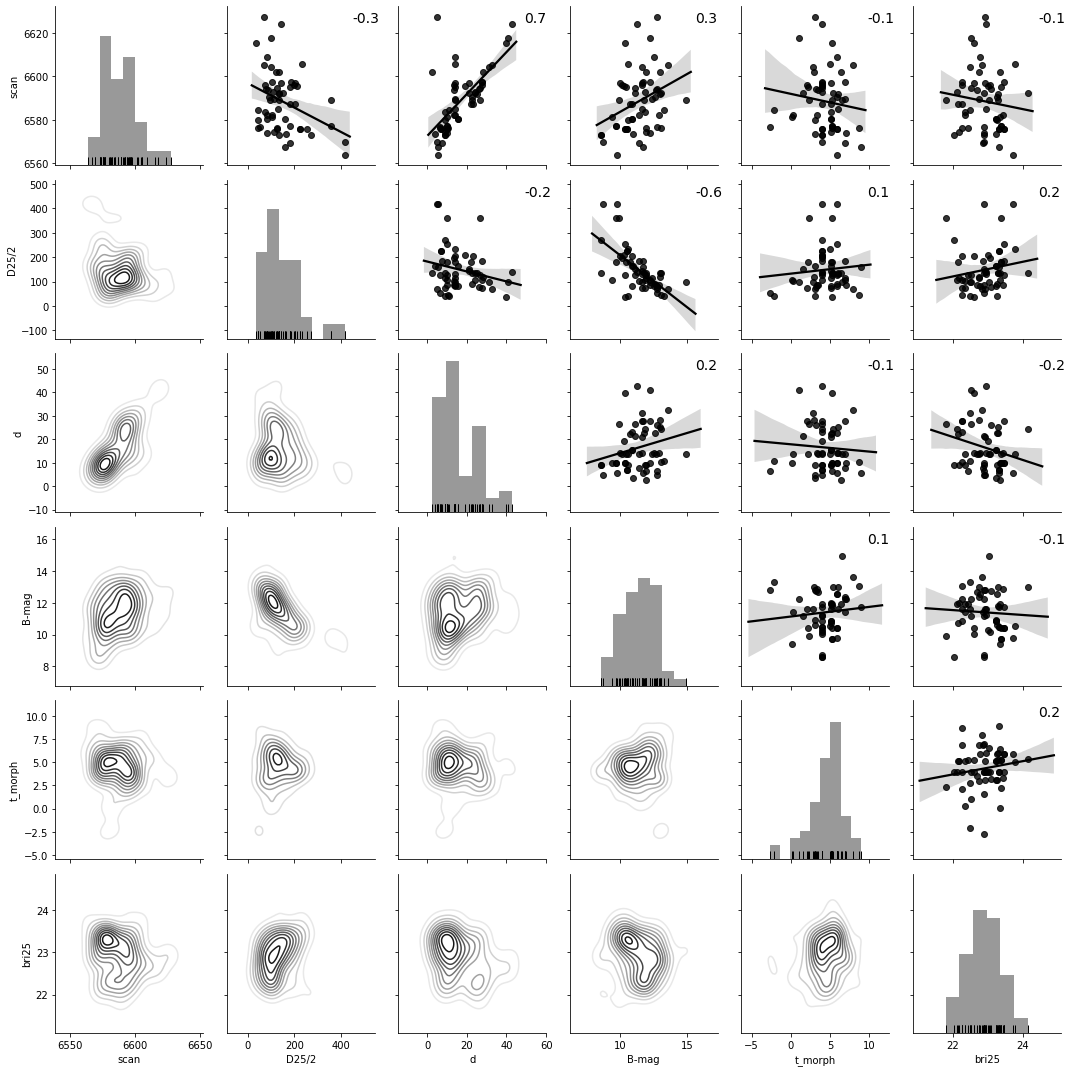

In [43]:
grid = sns.PairGrid(data=df, vars=['scan', 'D25/2', 'd', 'B-mag', 't_morph', 'bri25'], dropna=True)
grid = grid.map_upper(sns.regplot, color='black')
grid = grid.map_upper(corrfunc)
grid = grid.map_lower(sns.kdeplot, cmap='binary')
grid = grid.map_diag(sns.distplot, kde=False, rug=True, color='black')
plt.tight_layout()
plt.savefig('test.png', dpi=200)